<a href="https://colab.research.google.com/github/anbr1x/Portafolio/blob/main/ProyectoDSParteI%2BSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Abstrac:***

#### El presente proyecto tiene como objetivo aplicar técnicas de ciencia de datos para la creacion de un modelo de clasificacion binaria. sobre un conjunto de datos de transacciones bancarias, con el fin de identificar posibles casos de fraude financiero. El dataset utilizado consta de 2,512 registros que incluyen atributos relacionados con el comportamiento transaccional, características del cliente y patrones de uso, tales como monto, ubicación, canal de transacción, tipo de dispositivo, entre otros.
#### La motivación del proyecto radica en poner en práctica los conocimientos adquiridos durante el curso, mediante la implementación de modelo de clasificacion binaria, con el fin de detectar anomalías que se desvíen significativamente del comportamiento normal. Estas técnicas permiten analizar tanto aspectos estadísticos como espaciales y temporales del conjunto de datos.
#### El enfoque del estudio está orientado a la prevención de fraudes, demostrando cómo herramientas de ciencia de datos pueden aportar valor en el análisis de seguridad financiera. A través de esta propuesta, se busca desarrollar habilidades prácticas en la detección de patrones inusuales que podrían alertar sobre actividades sospechosas en el sistema bancario.









# ***Preguntas de interés:***



1.   ¿Existen patrones atípicos en el comportamiento transaccional que puedan ser indicios de fraude?

2.   ¿Qué características transaccionales (como el monto, la ubicación o el canal utilizado) son más frecuentes en las transacciones consideradas anómalas?

3.   ¿Las transacciones realizadas con múltiples intentos de inicio de sesión tienden a comportarse como outliers?

4.   ¿Hay ocupaciones o rangos de edad que presenten un mayor número de transacciones atípicas?




# ***Hipotesis:***


0.   H₀(Hipótesis nula): Las técnicas de clasificacion binaria o el dataset no permiten detectar de manera efectiva outliers con una precisionsignificativa en el dataset de transacciones bancarias.
1.   H1: Existen patrones transaccionales inusuales que pueden ser detectados como outliers y representar posibles indicios de fraude.
2.   H2: Las transacciones con montos extremos, ubicaciones atípicas o canales no habituales presentan mayor probabilidad de ser clasificadas como outliers.
3.   H3: Las transacciones precedidas por múltiples intentos de inicio de sesión tienen una mayor probabilidad de ser detectadas como outliers.
4.   H4: Existen ciertos rangos de edad u ocupaciones en los que se presentan más outliers, debido a variaciones en el comportamiento transaccional típico de esos grupos.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank_transactions_data_Clustered.csv")

In [4]:
df.Cluster.value_counts() #el 3 son los outliers

,count
Cluster,
0,1133
1,880
2,404
3,95


In [5]:
df_binary = df.copy()
df_binary.Cluster = df_binary.Cluster.map({1:0, 2:0, 2:0, 3:1}).fillna(df_binary.Cluster)

In [6]:
df_binary.Cluster.value_counts()

,count
Cluster,
0.0,2417
1.0,95


In [7]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [8]:
df_binary.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,DBSCAN_Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0.0,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0.0,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,0.0,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0.0,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,0.0,0


In [9]:
df_binary.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster,DBSCAN_Cluster
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,0.037818,0.086385
std,291.946243,17.792198,69.963757,0.602662,3900.942499,0.190795,0.737096
min,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000,-1.000000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,0.000000,0.000000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,0.000000,0.000000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,0.000000,0.000000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,1.000000,8.000000


# EDA (Analisis Exploratorio)

## ¿Qué características transaccionales (como el monto, la ubicación o el canal utilizado) son más frecuentes en las transacciones consideradas anómalas?



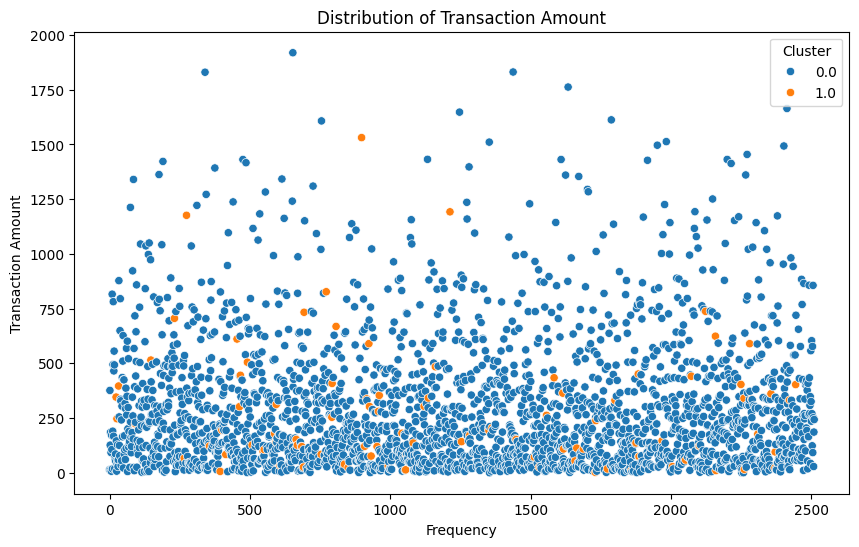

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x =df_binary.index ,y=df_binary['TransactionAmount'],hue=df_binary['Cluster'])
plt.ylabel('Transaction Amount')
plt.xlabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


### El grafico nos indica que, necesariamente montos altos indican outliers.

---



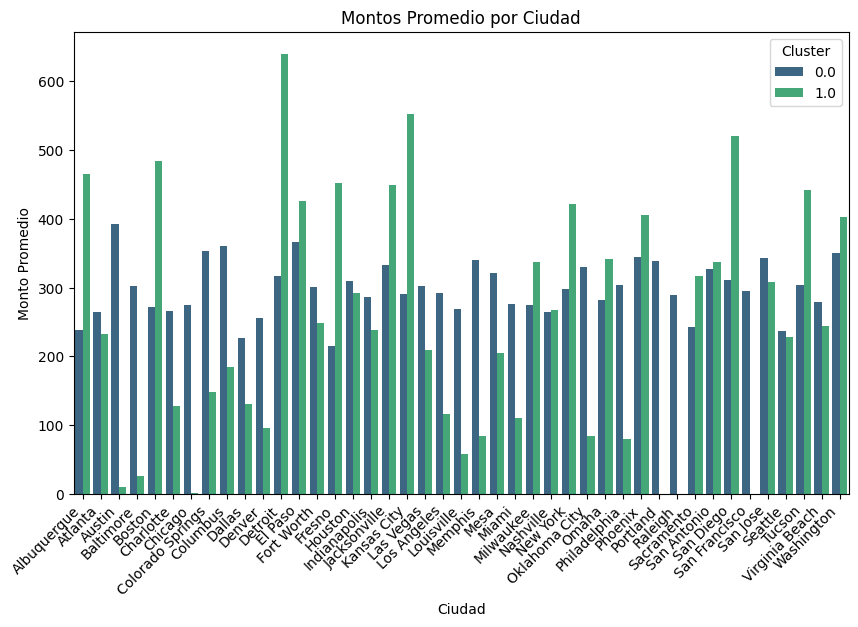

In [12]:
# Barplot: Monto Promedio por Ciudad
plt.figure(figsize=(10, 6))
# Calculate the mean Transaction Amount for each Location and Cluster
location_cluster_mean = df_binary.groupby(['Location', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Use the calculated means for the barplot
sns.barplot(data=location_cluster_mean, x='Location', y='TransactionAmount', hue='Cluster', palette='viridis')
plt.title('Montos Promedio por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Monto Promedio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [42]:
top_outliers = location_cluster_mean[location_cluster_mean['Cluster']==1].sort_values('TransactionAmount',ascending=False).head(10)['Location'].tolist()
top_location = location_cluster_mean[location_cluster_mean['Location'].isin(top_outliers)]
df_pivot =  top_location.pivot(index='Location', columns='Cluster', values='TransactionAmount')
df_pivot['Diferencia'] = df_pivot[1] - df_pivot[0]
df_pivot.sort_values(by='Diferencia',ascending=False)

Cluster,0.0,1.0,Diferencia
Location,,,
Detroit,316.884918,639.890000,323.005082
Kansas City,290.544211,551.870000,261.325789
Fresno,215.266379,452.750000,237.483621
Albuquerque,238.061538,464.845000,226.783462
Boston,271.815500,484.300000,212.484500
San Diego,311.688545,519.885000,208.196455
Tucson,303.310606,441.260000,137.949394
New York,297.731636,421.663333,123.931697
Jacksonville,332.203455,449.656000,117.452545


### Existen ciudades donde el monto promedio de outliers es mayor al de transacciones estandar, como son:


*   Detroit
*   Kansas City
*   Fresno
*   Albuquerque





---



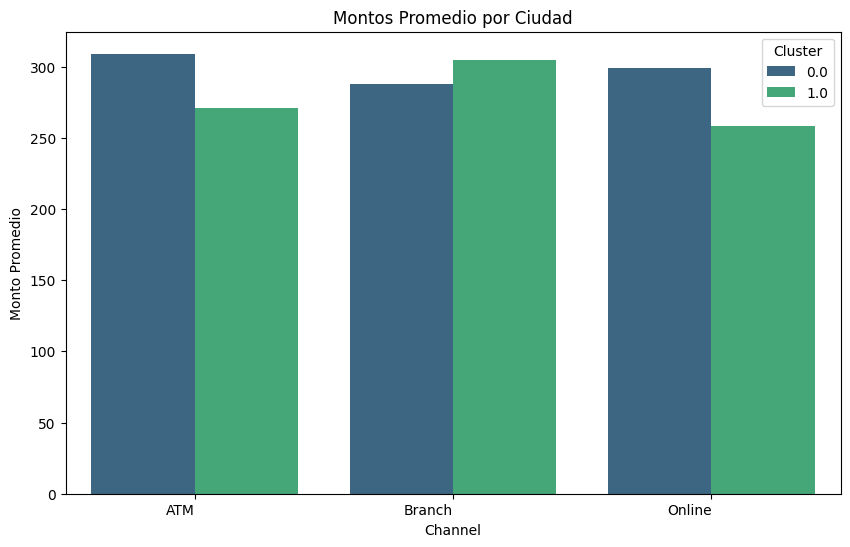

In [ ]:
# Barplot: Ventas promedio por Región
plt.figure(figsize=(10, 6))
# Calculate the mean Transaction Amount for each Location and Cluster
location_cluster_mean = df_binary.groupby(['Channel', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Use the calculated means for the barplot
sns.barplot(data=location_cluster_mean, x='Channel', y='TransactionAmount', hue='Cluster', palette='viridis')
plt.title('Montos Promedio por Ciudad')
plt.xlabel('Channel')
plt.ylabel('Monto Promedio')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### La atencion presencial tiene un monto de outliers ligeramente mayor a los montos de transcciones legitimas.

---



## ¿Las transacciones realizadas con múltiples intentos de inicio de sesión tienden a comportarse como outliers?


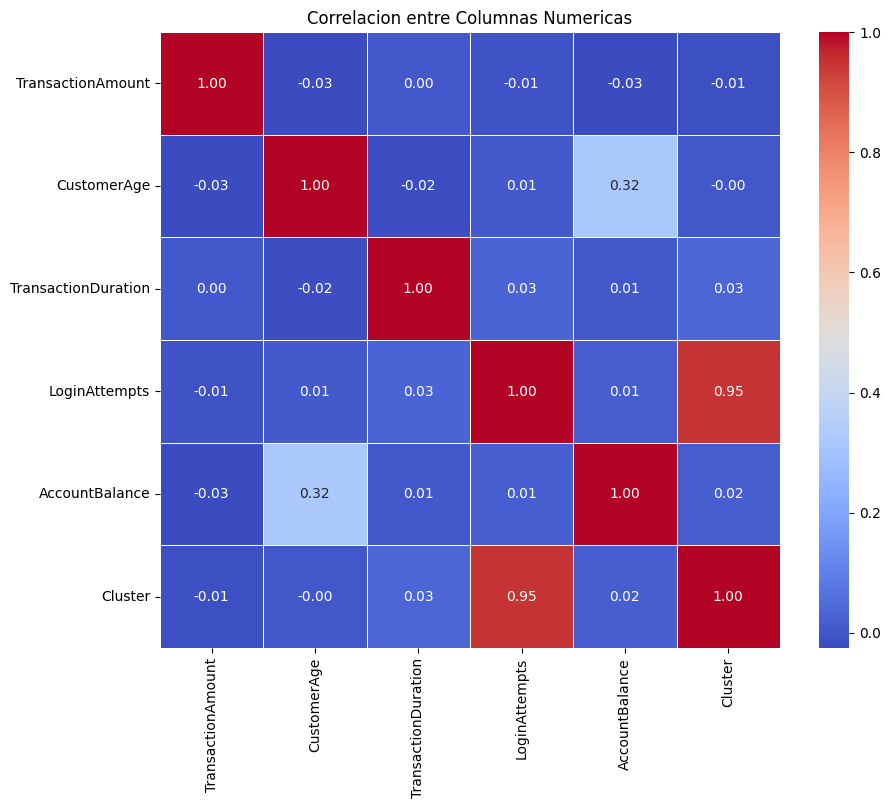

In [ ]:
correlation_matrix = df_binary[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','Cluster']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlacion entre Columnas Numericas')
plt.show()

### Podemos observar como un mayor numero de intentos de acceso se relaciona fuertemente con la clasificacion de outlier.



---





## ¿Hay ocupaciones o rangos de edad que presenten un mayor monto de transacciones atípicas?



<ipython-input-97-0cf6a5b7c9bb>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mean = df_binary.groupby(['AgeGroup', 'Cluster'])['TransactionAmount'].mean().reset_index()


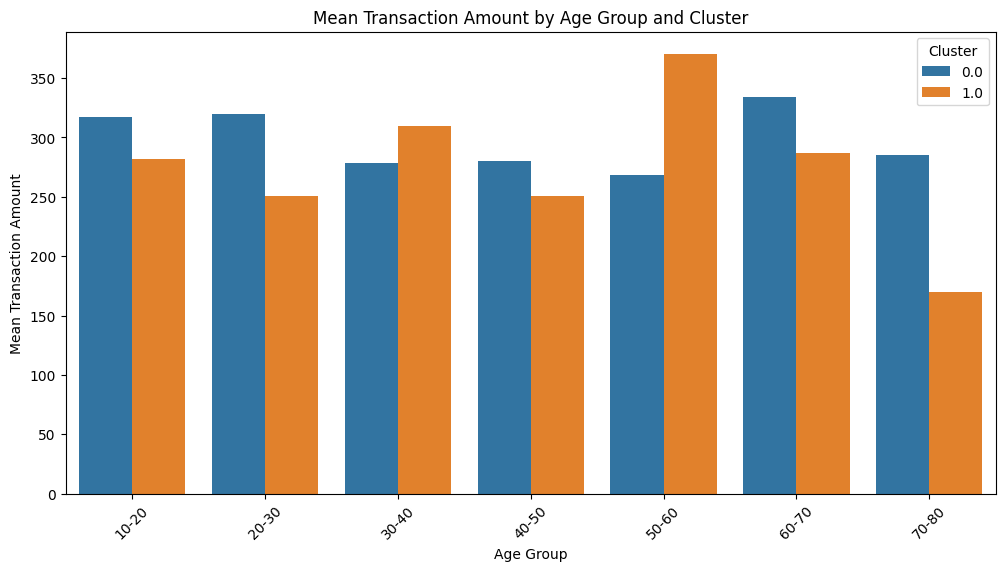

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna de grupo de edad usando pd.qcut
labes_l = ["10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
df_binary['AgeGroup'] = pd.qcut(df_binary['CustomerAge'], q=7, labels=labes_l)

# Analizar el monto promedio de transacciones por grupo de edad y clúster
age_group_mean = df_binary.groupby(['AgeGroup', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Visualizar los datos usando un barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_mean, x='AgeGroup', y='TransactionAmount', hue='Cluster')
plt.title('Mean Transaction Amount by Age Group and Cluster')
plt.xlabel('Age Group')
plt.ylabel('Mean Transaction Amount')
plt.xticks(rotation=45)
plt.show()



### Los grupos de 30-40 y 50-60, son los unicos grupos en los que el monto promedio de transacciones es mayor en outliers que en transaccione legitimas.


---



In [ ]:
## Ocupaciones

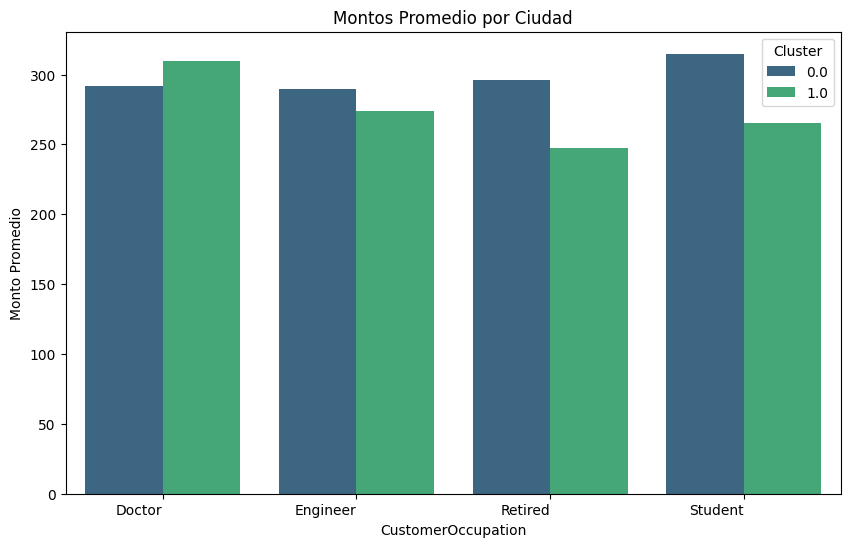

In [ ]:
# Barplot: Ventas promedio por Región
plt.figure(figsize=(10, 6))
# Calculate the mean Transaction Amount for each Location and Cluster
location_cluster_mean = df_binary.groupby(['CustomerOccupation', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Use the calculated means for the barplot
sns.barplot(data=location_cluster_mean, x='CustomerOccupation', y='TransactionAmount', hue='Cluster', palette='viridis')
plt.title('Montos Promedio por Ciudad')
plt.xlabel('CustomerOccupation')
plt.ylabel('Monto Promedio')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### La unica ocupacion en la que el monton promedio de transacciones es mayor en los casos de outliers, es en los medicos.


---




# Comprobacion de valores faltantes


In [43]:
# Contar valores nulos por columna
print("Conteo de valores nulos por columna:")
print(df_binary.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df_binary.isnull().sum() / len(df)) * 100)

Conteo de valores nulos por columna:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
Cluster                    0
DBSCAN_Cluster             0
dtype: int64

Porcentaje de valores nulos por columna:
TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDur

In [45]:
import missingno as msno


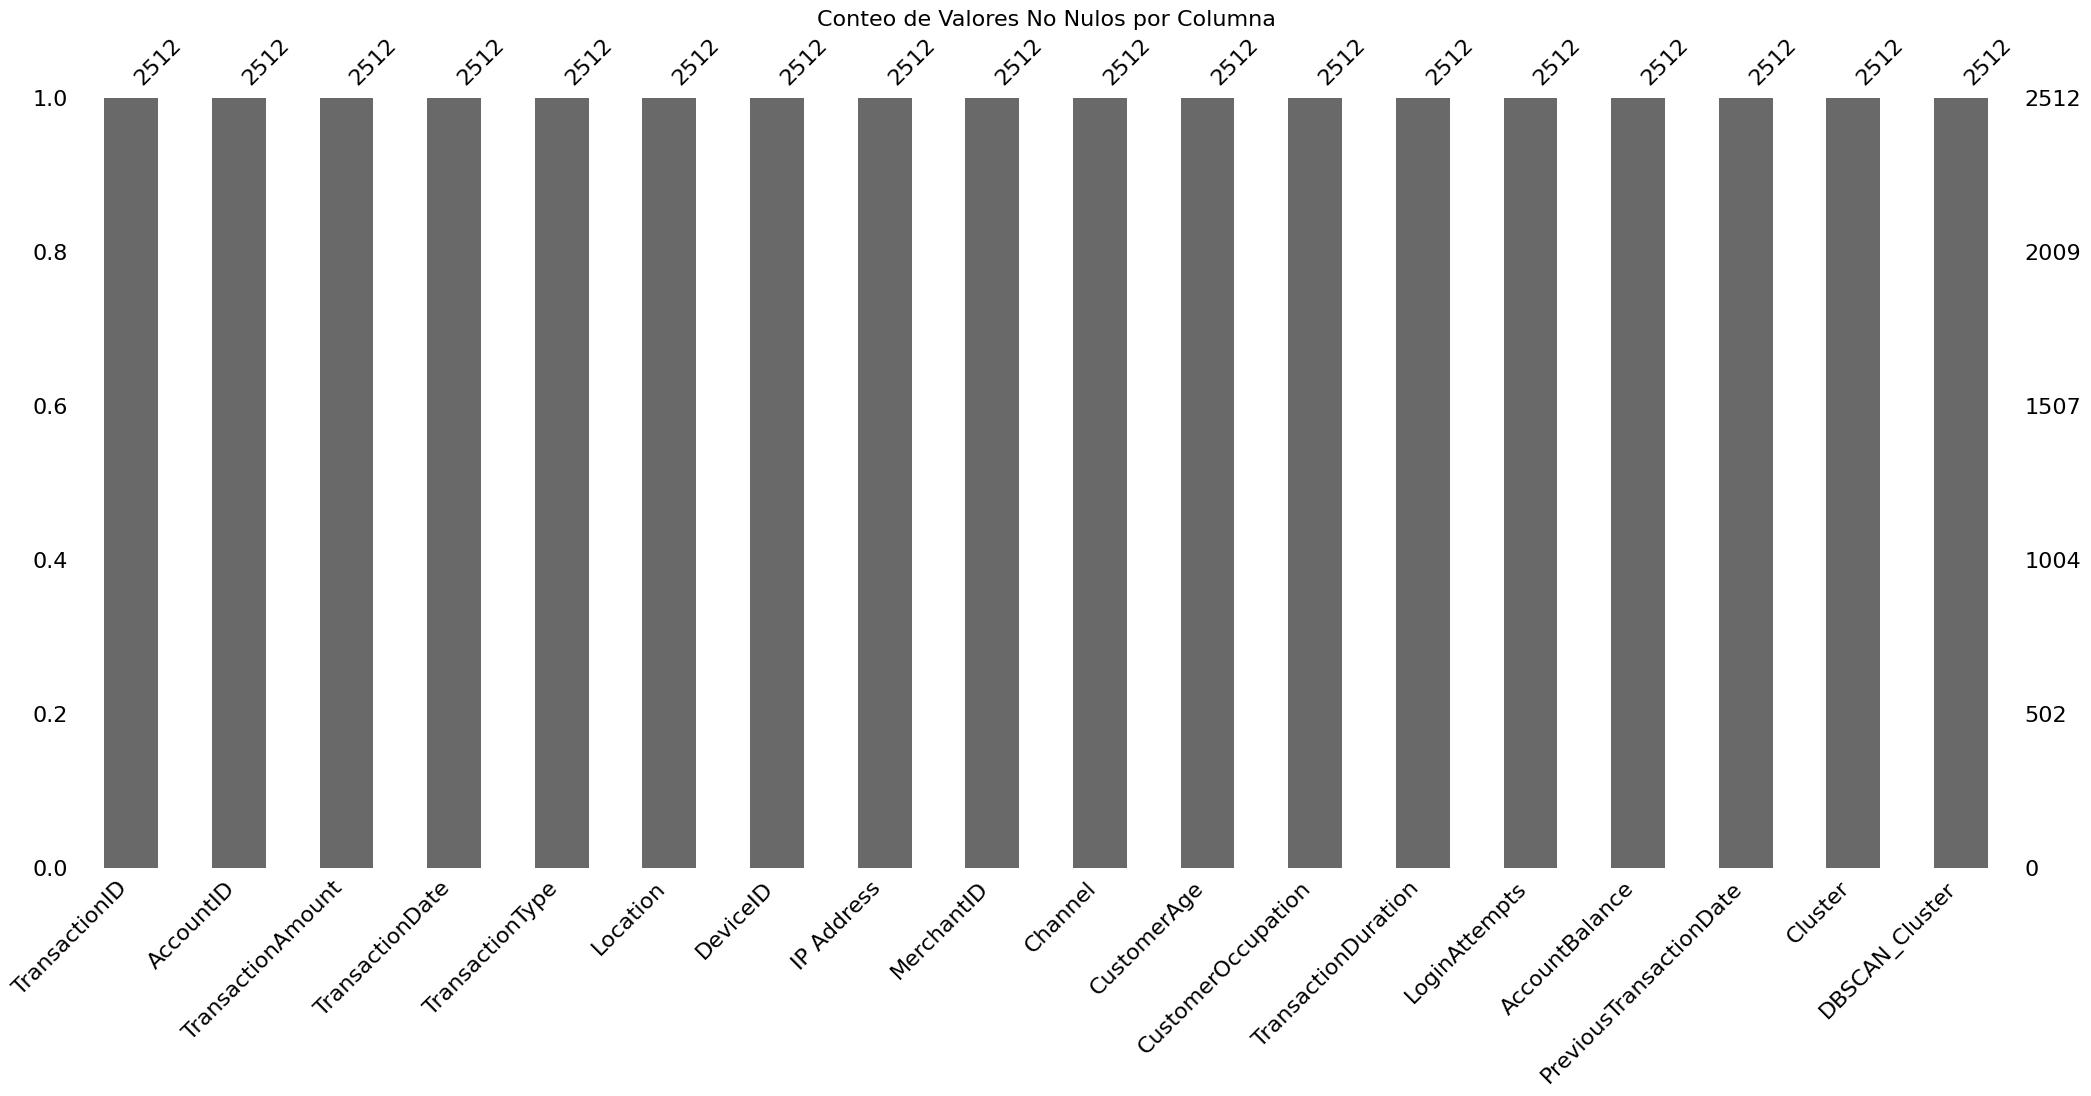

In [46]:
# Gráfico de barras de ausentismo: similar a .isnull().sum() pero gráfico
msno.bar(df_binary)
plt.title('Conteo de Valores No Nulos por Columna', fontsize=16)
plt.show()